In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math

In [2]:
# load metadata
metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/inputs/metadata_stool.tsv", sep='\t')
metadata = metadata.iloc[1:]
metadata.set_index('#SampleID', inplace=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,1_BA_1,B1,A1,P1,25,F,170,77,26.6,overweight,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
1_BA_2,1_BA_2,B1,B1,P1,25,F,170,77,26.6,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2
1_BA_3,1_BA_3,B1,C1,P1,25,F,170,78,27,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8
1_BA_4,1_BA_4,B1,D1,P1,25,F,170,79,27.3,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14
1_BA_5,1_BA_5,B1,E1,P1,25,F,170,80,27.7,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mock_4_DNA,mock_4_DNA,B2,B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21_PP_8_ADA,21_PP_8_ADA,B2,E12,P21_ADA,25,F,165,64,23.5,normal,...,NaN,CD_NA,NaN,NaN,NaN,NaN,CD_NA,NaN,NaN,CD_NA
P72_DM_7,P72_DM_7,B2,F12,P72,34,F,175,56,18.3,underweight,...,full_response_end,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38


In [3]:
# load shannon diversity values for HC longitudinal
shannon_HCl = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_HC_longitudinal/alpha/shannon.tsv", sep='\t')
shannon_HCl = shannon_HCl.iloc[1:]
shannon_HCl.set_index('Sample ID', inplace=True)

# load shannon diversity values for Large cohort
shannon = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/alpha/shannon.tsv", sep='\t')
shannon = shannon.iloc[1:]
shannon.set_index('SampleID', inplace=True)

# load fungal shannon diversity values for HC longitudinal
shannonf_HCl = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_H/diversity_HC_longitudinal/alpha/shannon.tsv", sep='\t')
shannonf_HCl = shannonf_HCl.iloc[1:]
shannonf_HCl.set_index('Sample ID', inplace=True)

# load fungal shannon diversity values for Large cohort
shannonf = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_H/diversity_Large_cohort/alpha/shannon.tsv", sep='\t')
shannonf = shannonf.iloc[1:]
shannonf.set_index('Sample ID', inplace=True)


In [4]:
# merge shannon with metadata
hc = metadata.merge(shannon_HCl, how='inner', left_index=True, right_index=True)
patients = metadata.merge(shannon, how='inner', left_index=True, right_index=True)
cd = patients[patients['Dg']=='CD']
uc = patients[patients['Dg']=='UC']

hcf = metadata.merge(shannonf_HCl, how='inner', left_index=True, right_index=True)
patientsf = metadata.merge(shannonf, how='inner', left_index=True, right_index=True)
cdf = patientsf[patientsf['Dg']=='CD']
ucf = patientsf[patientsf['Dg']=='UC']

In [5]:
convert_dict = {'Week_num': float,
                'Visit_num': float,
                'HBI_num': float,
                'pMayo_num': float,
                'Shannon_entropy': float
               }
cd = cd.astype(convert_dict)
uc = uc.astype(convert_dict)
hc['shannon_entropy'] = hc['shannon_entropy'].astype(float)

cdf = cdf.astype(convert_dict)
ucf = ucf.astype(convert_dict)
hcf['shannon_entropy'] = hcf['shannon_entropy'].astype(float)

In [6]:
# compute mean and standard deviation for errorbars

# create a dictionary having individual patients as keys
patients_hc = dict()
for individual in hc['Patient'].unique():
    patients_hc[individual] = hc[(hc['Patient'] == individual)][["Week_num","shannon_entropy"]]

patients_cd = dict()
for individual in cd['Patient'].unique():
    patients_cd[individual] = cd[(cd['Patient'] == individual)][["Week_num","Shannon_entropy"]]

patients_uc = dict()
for individual in uc['Patient'].unique():
    patients_uc[individual] = uc[(uc['Patient'] == individual)][["Week_num","Shannon_entropy"]]

patients_hcf = dict()
for individual in hcf['Patient'].unique():
    patients_hcf[individual] = hcf[(hcf['Patient'] == individual)][["Week_num","shannon_entropy"]]

patients_cdf = dict()
for individual in cdf['Patient'].unique():
    patients_cdf[individual] = cdf[(cdf['Patient'] == individual)][["Week_num","Shannon_entropy"]]

patients_ucf = dict()
for individual in ucf['Patient'].unique():
    patients_ucf[individual] = ucf[(ucf['Patient'] == individual)][["Week_num","Shannon_entropy"]]

    
# calculate mean and std
mean_hc=[]
std_hc=[]
for individual in patients_hc.keys():
    mean_hc.append(stat.mean(patients_hc[individual]["shannon_entropy"]))
    std_hc.append((patients_hc[individual]["shannon_entropy"]).std())

mean_cd=[]
std_cd=[]
for individual in patients_cd.keys():
    mean_cd.append(stat.mean(patients_cd[individual]["Shannon_entropy"]))
    std_cd.append((patients_cd[individual]["Shannon_entropy"]).std())
std_cd = [0 if math.isnan(x) else x for x in std_cd]

mean_uc=[]
std_uc=[]
for individual in patients_uc.keys():
    mean_uc.append(stat.mean(patients_uc[individual]["Shannon_entropy"]))
    std_uc.append((patients_uc[individual]["Shannon_entropy"]).std())
std_uc = [0 if math.isnan(x) else x for x in std_uc]


mean_hcf=[]
std_hcf=[]
for individual in patients_hcf.keys():
    mean_hcf.append(stat.mean(patients_hcf[individual]["shannon_entropy"]))
    std_hcf.append((patients_hcf[individual]["shannon_entropy"]).std())

mean_cdf=[]
std_cdf=[]
for individual in patients_cdf.keys():
    mean_cdf.append(stat.mean(patients_cdf[individual]["Shannon_entropy"]))
    std_cdf.append((patients_cdf[individual]["Shannon_entropy"]).std())
std_cdf = [0 if math.isnan(x) else x for x in std_cdf]

mean_ucf=[]
std_ucf=[]
for individual in patients_ucf.keys():
    mean_ucf.append(stat.mean(patients_ucf[individual]["Shannon_entropy"]))
    std_ucf.append((patients_ucf[individual]["Shannon_entropy"]).std())
std_ucf = [0 if math.isnan(x) else x for x in std_ucf]


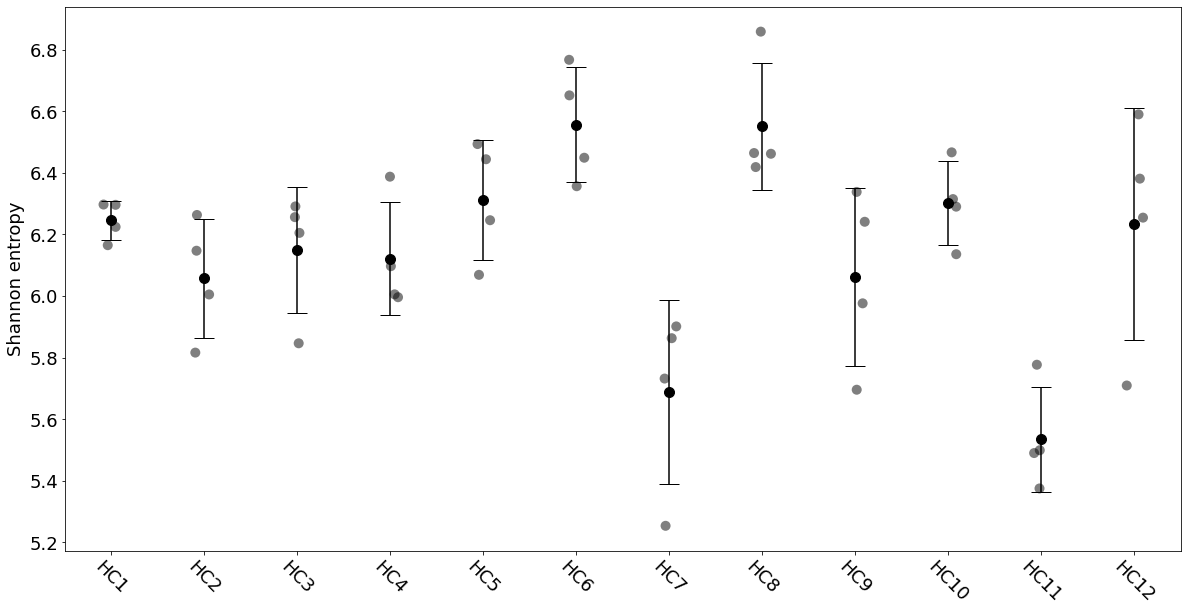

In [7]:
f1, ax = plt.subplots(figsize=(20, 10))
ax.errorbar(x=hc['Patient'].unique(), y=mean_hc, yerr=std_hc, color='black', linestyle='None', marker='o', markersize=10, capsize=10) 
sns.stripplot(ax=ax, data=hc, x="Patient", y="shannon_entropy", size=10, alpha=.5, color='black')
ax.set_ylabel('Shannon entropy', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(["HC1","HC2","HC3","HC4","HC5","HC6","HC7","HC8","HC9","HC10","HC11","HC12"])
ax.tick_params(axis='both', labelsize=18)
ax.tick_params(axis='x', labelrotation=-45)

#f1.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_HC_longitudinal/HC_boxplots.png')


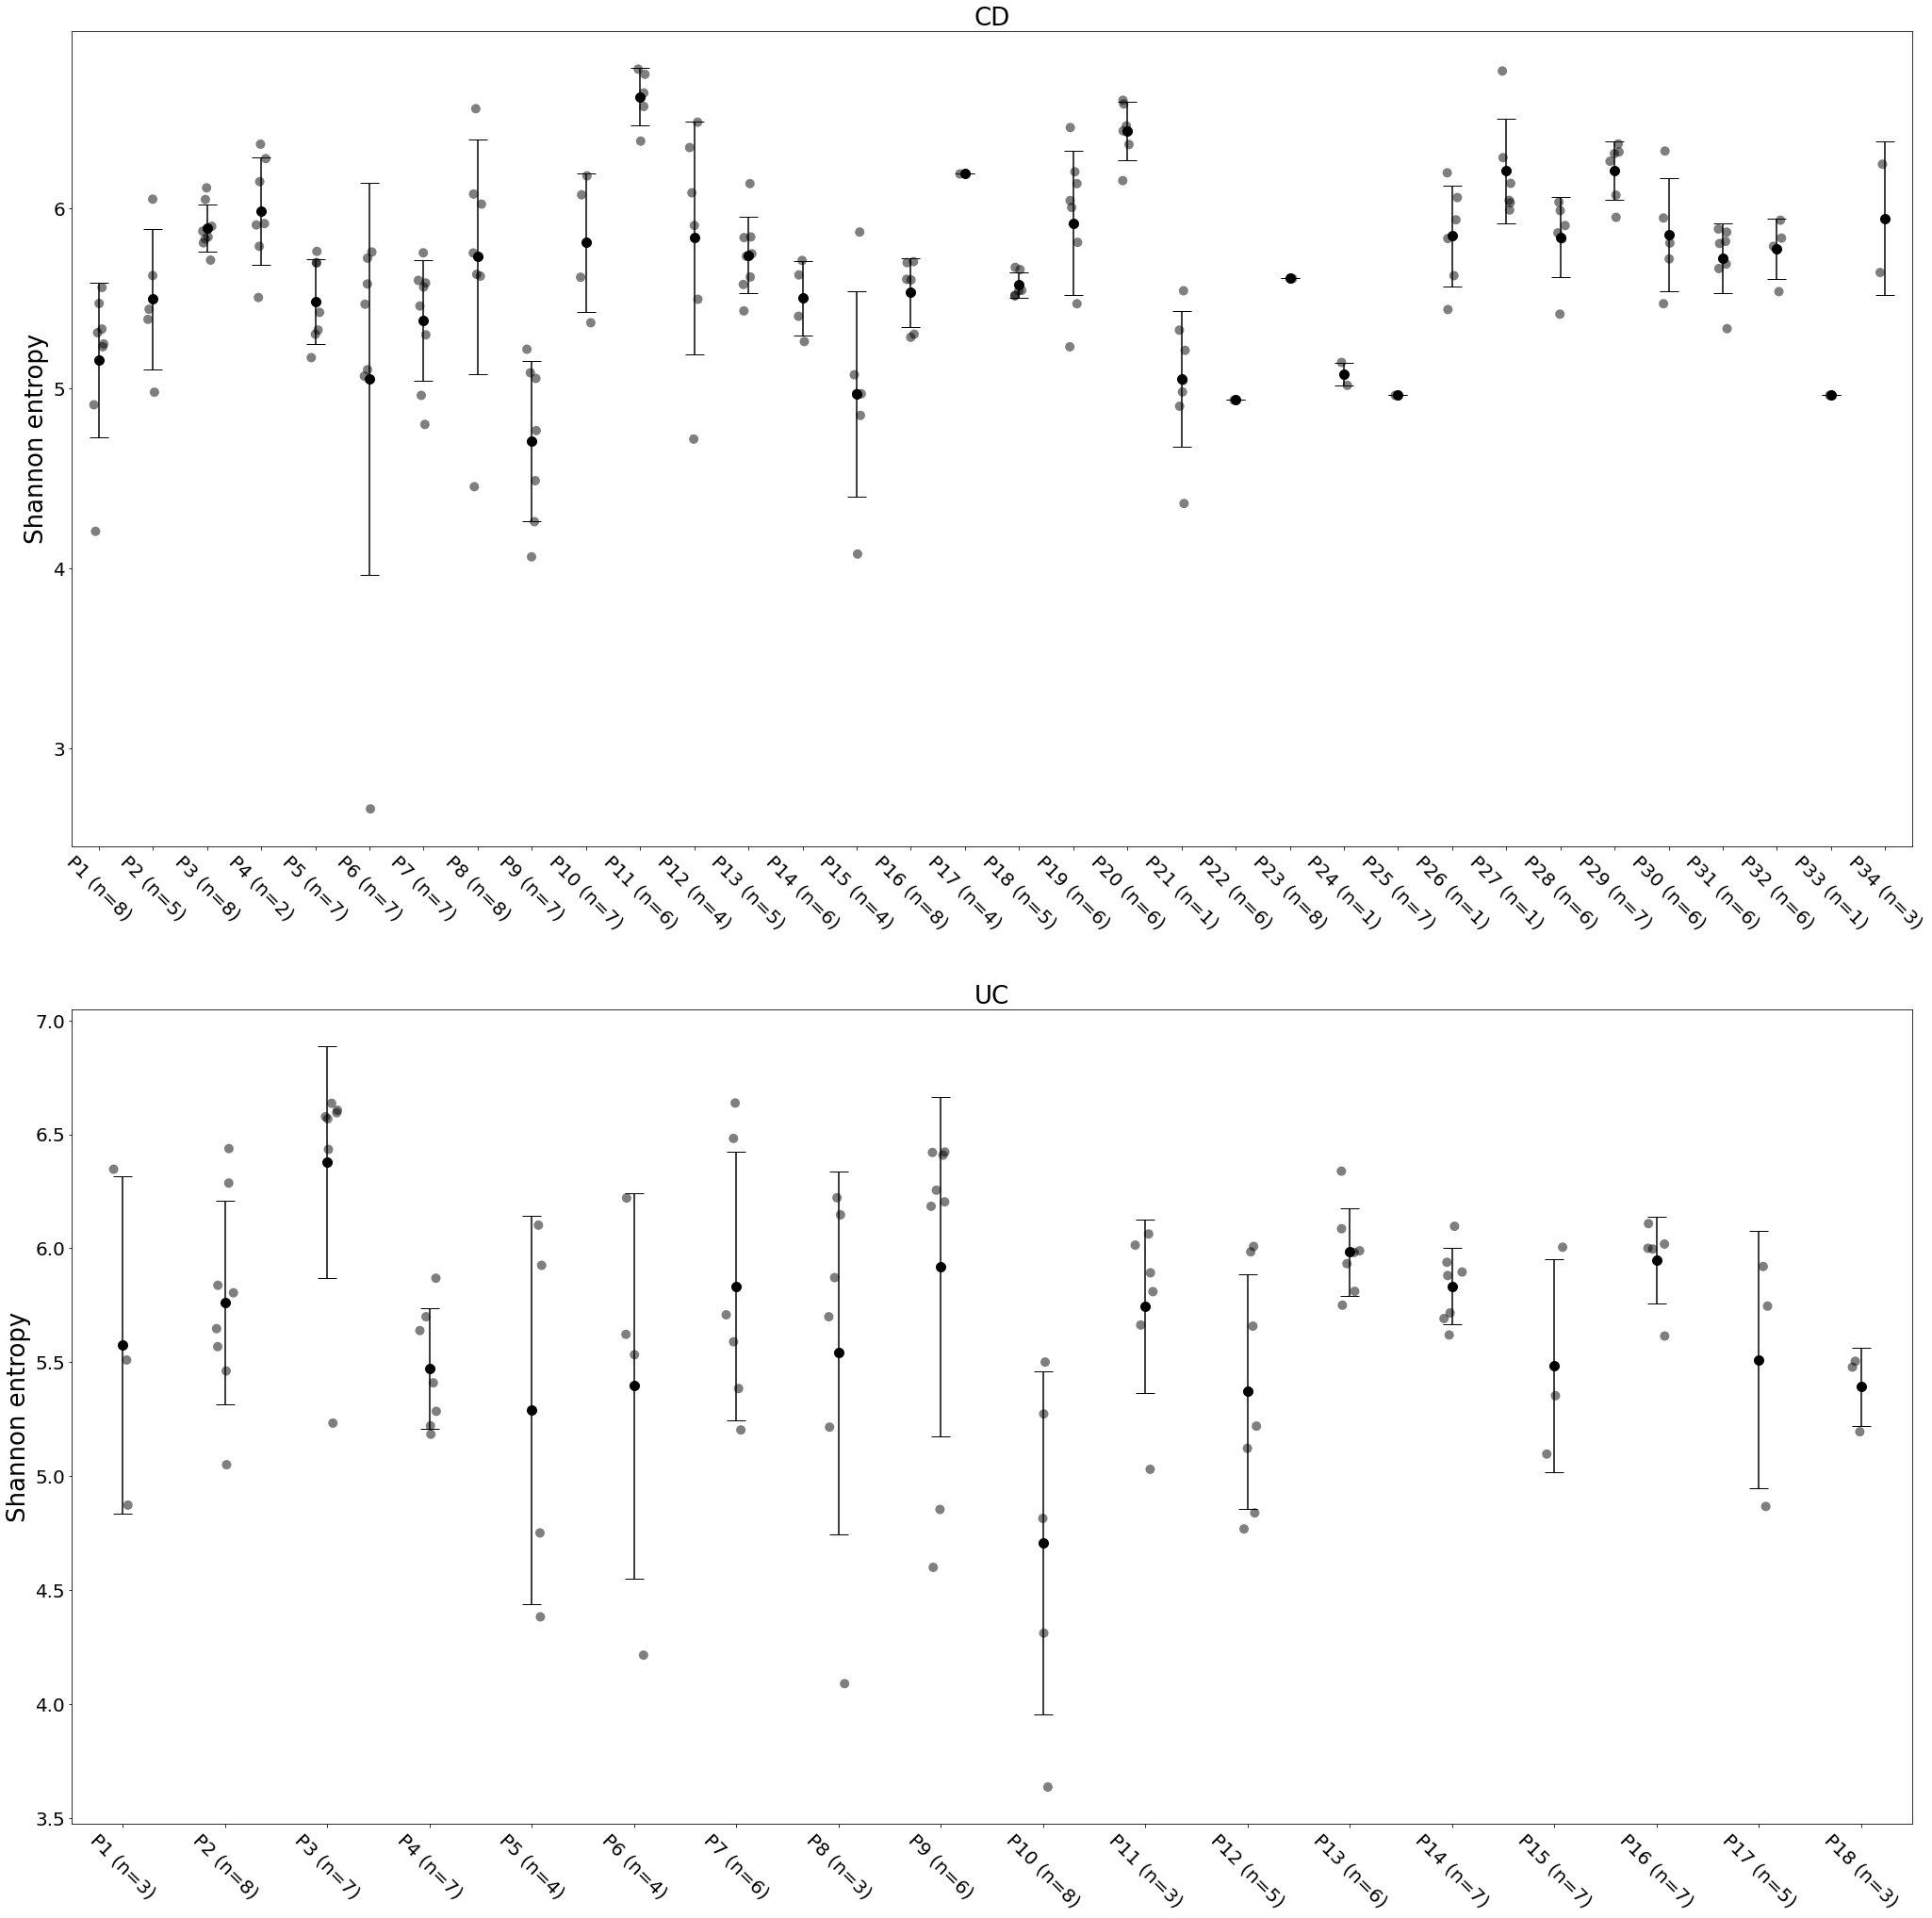

In [8]:
f2, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,35))
# CD
ax1.errorbar(x=cd['Patient'].unique(), y=mean_cd, yerr=std_cd, color='black', linestyle='None', 
             marker='o', markersize=10, capsize=10)
sns.stripplot(ax=ax1, data=cd, x="Patient", y="Shannon_entropy", size=10, alpha=.5, color='black')
ax1.set_title('CD', fontsize=26)
ax1.set_ylabel('Shannon entropy', fontsize=26)
ax1.set_xlabel('', fontsize=20)
ax1.set_xticklabels(["P1 (n=8)","P2 (n=5)","P3 (n=8)","P4 (n=2)","P5 (n=7)","P6 (n=7)","P7 (n=7)",
                     "P8 (n=8)","P9 (n=7)","P10 (n=7)","P11 (n=6)","P12 (n=4)","P13 (n=5)",
                     "P14 (n=6)","P15 (n=4)","P16 (n=8)","P17 (n=4)","P18 (n=5)","P19 (n=6)",
                     "P20 (n=6)","P21 (n=1)","P22 (n=6)","P23 (n=8)","P24 (n=1)","P25 (n=7)","P26 (n=1)",
                     "P27 (n=1)","P28 (n=6)","P29 (n=7)","P30 (n=6)","P31 (n=6)","P32 (n=6)","P33 (n=1)",
                     "P34 (n=3)"])
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='x', labelrotation=-45)

#UC
ax2.errorbar(x=uc['Patient'].unique(), y=mean_uc, yerr=std_uc, color='black', linestyle='None', 
             marker='o', markersize=10, capsize=10)
sns.stripplot(ax=ax2, data=uc, x="Patient", y="Shannon_entropy", size=10, alpha=.5, color='black')
ax2.set_title('UC', fontsize=26)
ax2.set_ylabel('Shannon entropy', fontsize=26)
ax2.set_xlabel('', fontsize=20)
ax2.set_xticklabels(["P1 (n=3)","P2 (n=8)","P3 (n=7)","P4 (n=7)","P5 (n=4)","P6 (n=4)","P7 (n=6)","P8 (n=3)",
                     "P9 (n=6)","P10 (n=8)","P11 (n=3)","P12 (n=5)","P13 (n=6)","P14 (n=7)","P15 (n=7)","P16 (n=7)",
                     "P17 (n=5)","P18 (n=3)"])
ax2.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='x', labelrotation=-45)



#f2.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/Patient_boxplots.png')


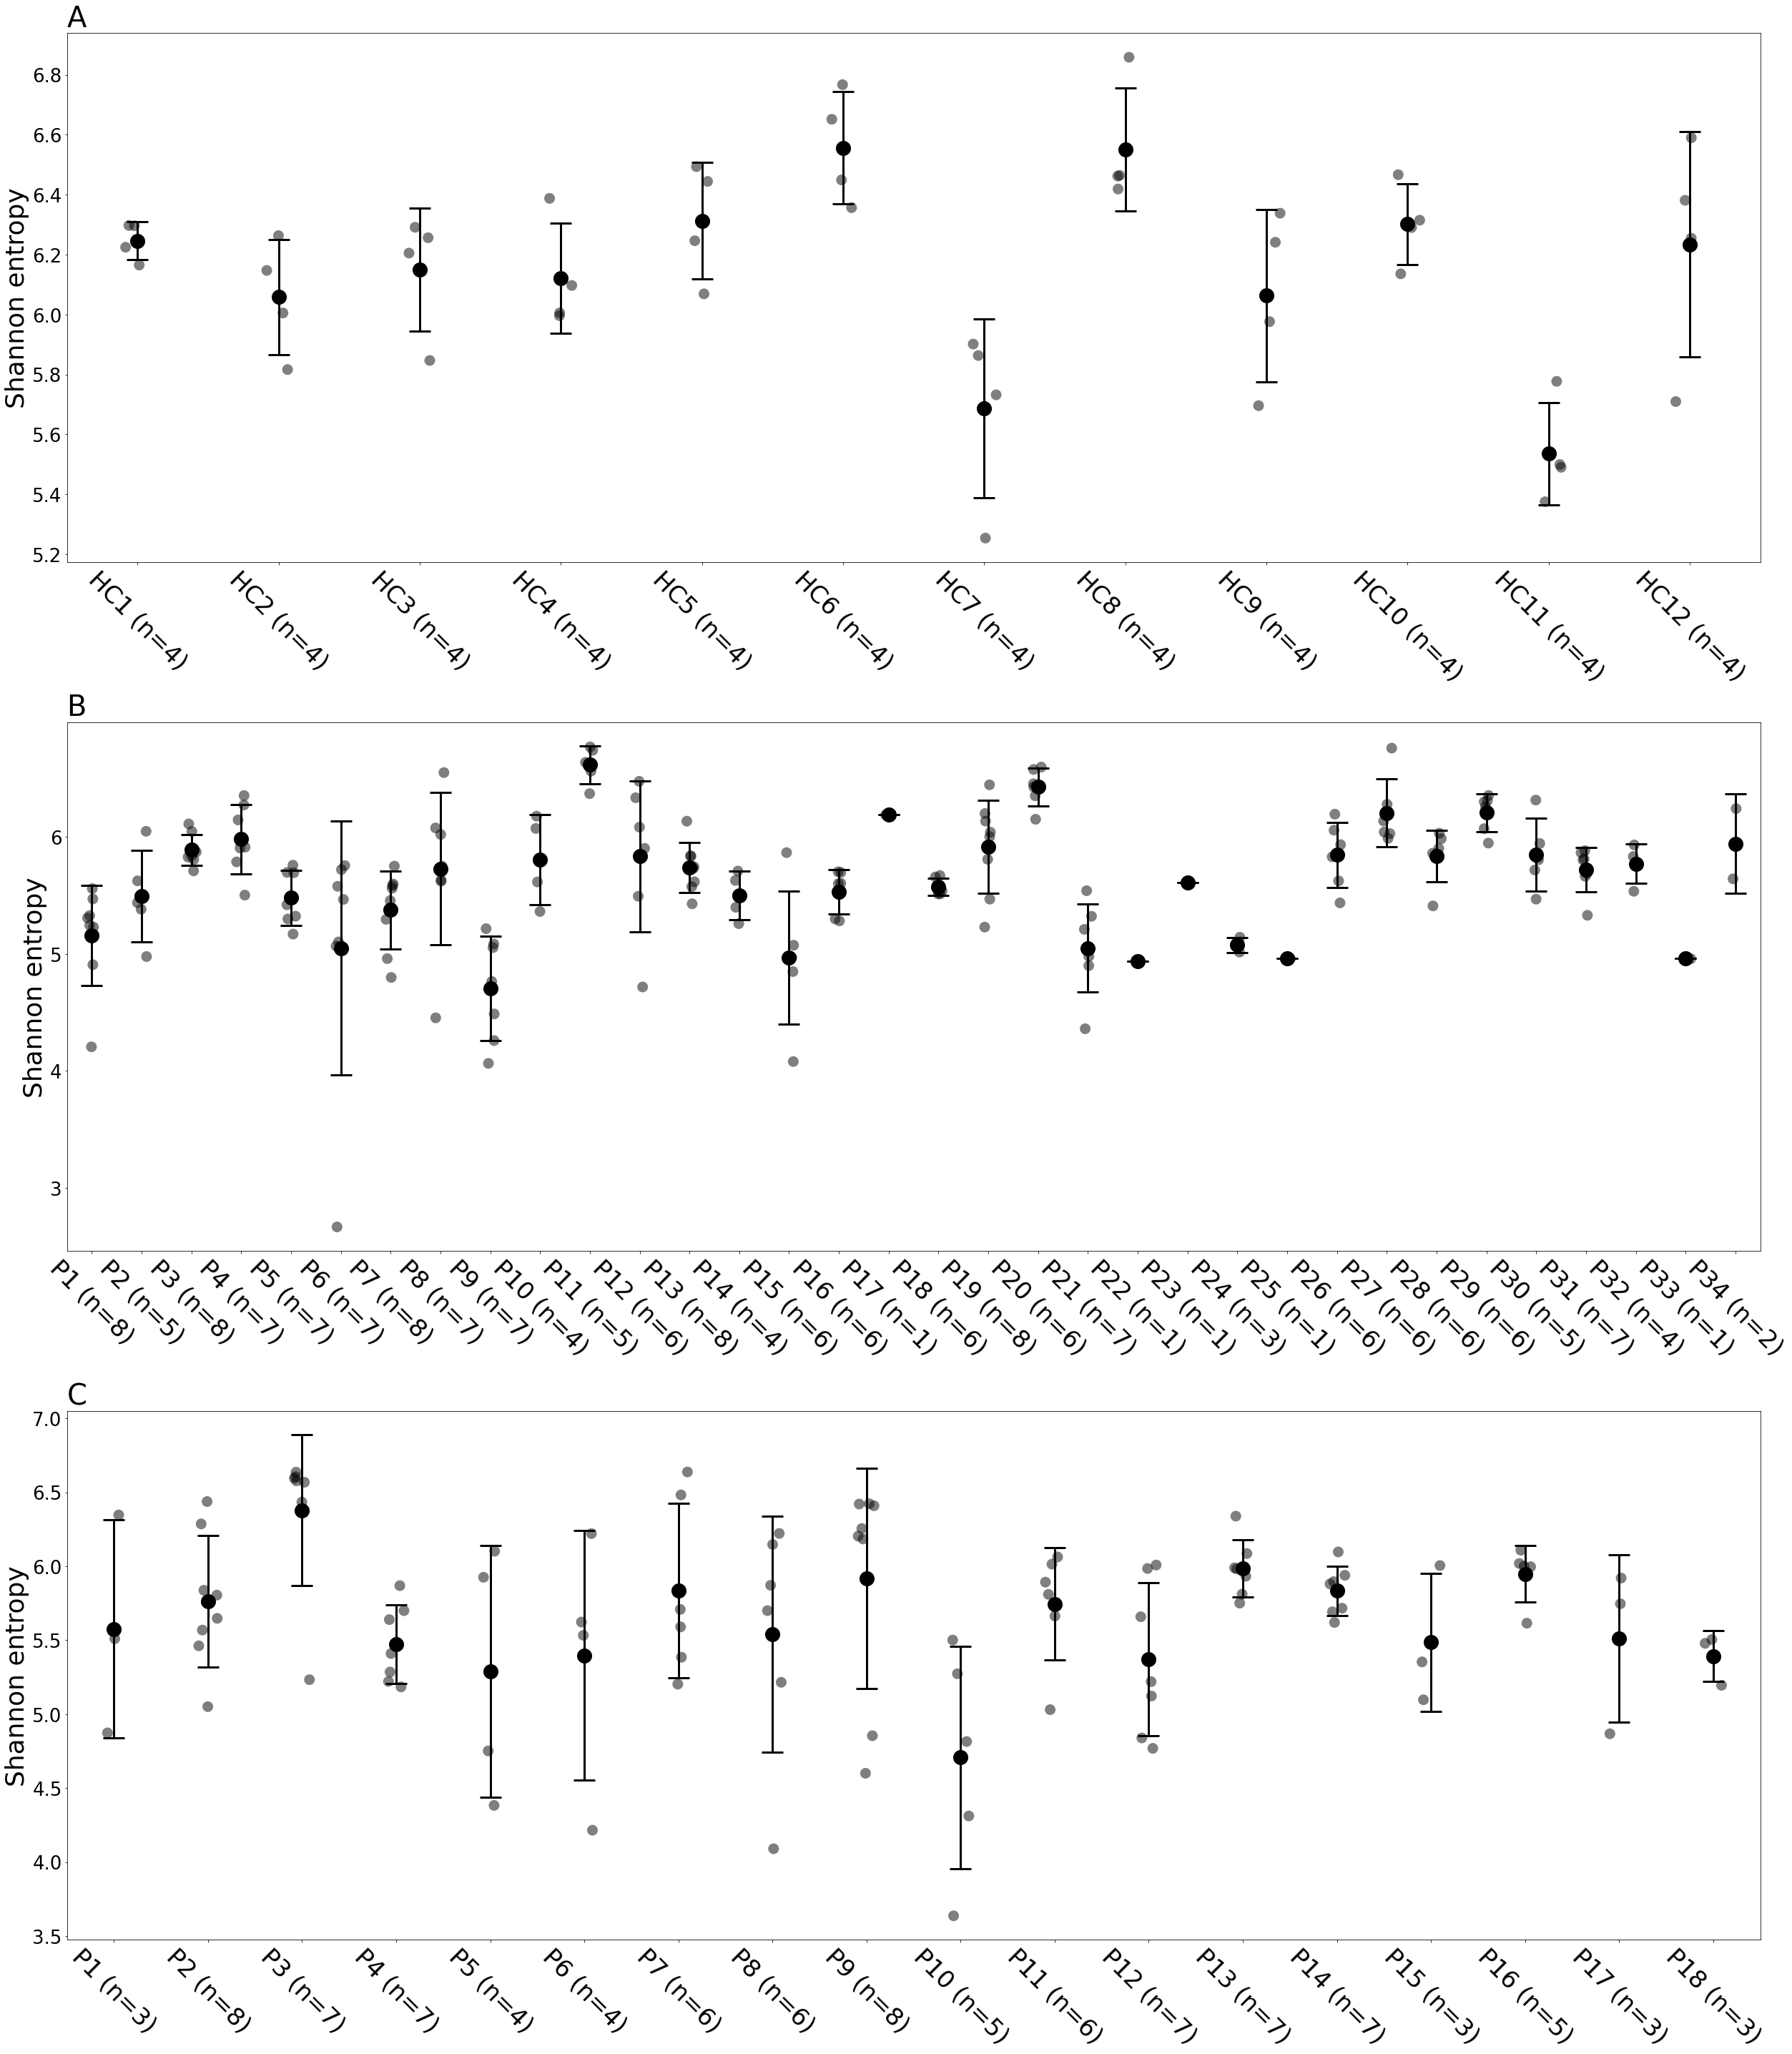

In [13]:
f12, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(35,40))

# HC
ax1.errorbar(x=hc['Patient'].unique(), y=mean_hc, yerr=std_hc, color='black', linestyle='None', marker='o', 
             markersize=20, capsize=15, elinewidth=3, capthick=3)
sns.stripplot(ax=ax1, data=hc, x="Patient", y="shannon_entropy", size=15, alpha=.5, color='black')
ax1.set_title('A', fontsize=40, loc='left')
ax1.set_ylabel('Shannon entropy', fontsize=36)
ax1.set_xlabel('')
ax1.set_xticklabels(["HC1 (n=4)","HC2 (n=4)","HC3 (n=4)","HC4 (n=4)","HC5 (n=4)","HC6 (n=4)","HC7 (n=4)",
                     "HC8 (n=4)","HC9 (n=4)","HC10 (n=4)","HC11 (n=4)","HC12 (n=4)"])
ax1.tick_params(axis='both', labelsize=26)
ax1.tick_params(axis='x', labelrotation=-45, labelsize=34)

# CD
ax2.errorbar(x=cd['Patient'].unique(), y=mean_cd, yerr=std_cd, color='black', linestyle='None', marker='o', 
             markersize=20, capsize=15, elinewidth=3, capthick=3)
sns.stripplot(ax=ax2, data=cd, x="Patient", y="Shannon_entropy", size=15, alpha=.5, color='black')
ax2.set_title('B', fontsize=40, loc='left')
ax2.set_ylabel('Shannon entropy', fontsize=36)
ax2.set_xlabel('')
ax2.set_xticklabels(["P1 (n=8)","P2 (n=5)","P3 (n=8)","P4 (n=7)","P5 (n=7)","P6 (n=7)","P7 (n=8)",
                     "P8 (n=7)","P9 (n=7)","P10 (n=4)","P11 (n=5)","P12 (n=6)","P13 (n=8)",
                     "P14 (n=4)","P15 (n=6)","P16 (n=6)","P17 (n=1)","P18 (n=6)","P19 (n=8)",
                     "P20 (n=6)","P21 (n=7)","P22 (n=1)","P23 (n=1)","P24 (n=3)","P25 (n=1)","P26 (n=6)",
                     "P27 (n=6)","P28 (n=6)","P29 (n=6)","P30 (n=5)","P31 (n=7)","P32 (n=4)","P33 (n=1)",
                     "P34 (n=2)"])
ax2.tick_params(axis='both', labelsize=26)
ax2.tick_params(axis='x', labelrotation=-45, labelsize=34)

#UC
ax3.errorbar(x=uc['Patient'].unique(), y=mean_uc, yerr=std_uc, color='black', linestyle='None', marker='o', 
             markersize=20, capsize=15, elinewidth=3, capthick=3)
sns.stripplot(ax=ax3, data=uc, x="Patient", y="Shannon_entropy", size=15, alpha=.5, color='black')
ax3.set_title('C', fontsize=40, loc='left')
ax3.set_ylabel('Shannon entropy', fontsize=36)
ax3.set_xlabel('')
ax3.set_xticklabels(["P1 (n=3)","P2 (n=8)","P3 (n=7)","P4 (n=7)","P5 (n=4)","P6 (n=4)","P7 (n=6)","P8 (n=6)",
                     "P9 (n=8)","P10 (n=5)","P11 (n=6)","P12 (n=7)","P13 (n=7)","P14 (n=7)","P15 (n=3)",
                     "P16 (n=5)","P17 (n=3)","P18 (n=3)"])
ax3.tick_params(axis='both', labelsize=26)
ax3.tick_params(axis='x', labelrotation=-45, labelsize=34)

plt.tight_layout()



f12.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/HCPatient_boxplots.png')



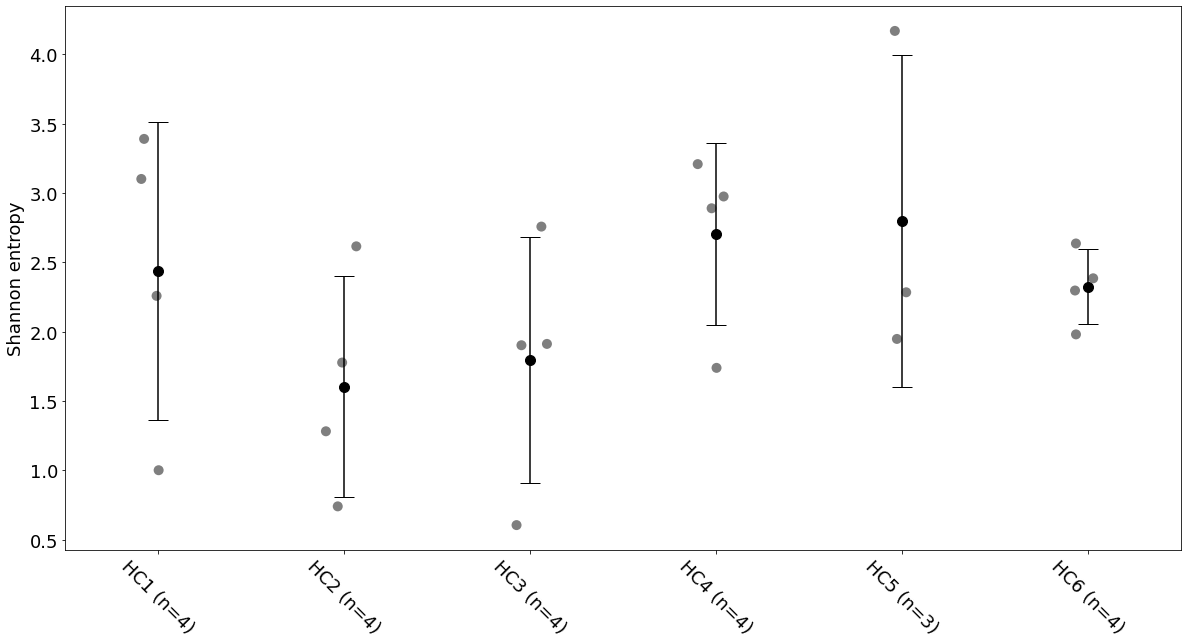

In [10]:
f3, ax = plt.subplots(figsize=(20, 10))
ax.errorbar(x=hcf['Patient'].unique(), y=mean_hcf, yerr=std_hcf, color='black', linestyle='None', 
            marker='o', markersize=10, capsize=10)
sns.stripplot(ax=ax, data=hcf, x="Patient", y="shannon_entropy", size=10, alpha=.5, color='black')
ax.set_ylabel('Shannon entropy', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(["HC1 (n=4)","HC2 (n=4)","HC3 (n=4)","HC4 (n=4)","HC5 (n=3)","HC6 (n=4)"])
ax.tick_params(axis='both', labelsize=18)
ax.tick_params(axis='x', labelrotation=-45)

f3.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_H/diversity_HC_longitudinal/HC_boxplots.png')


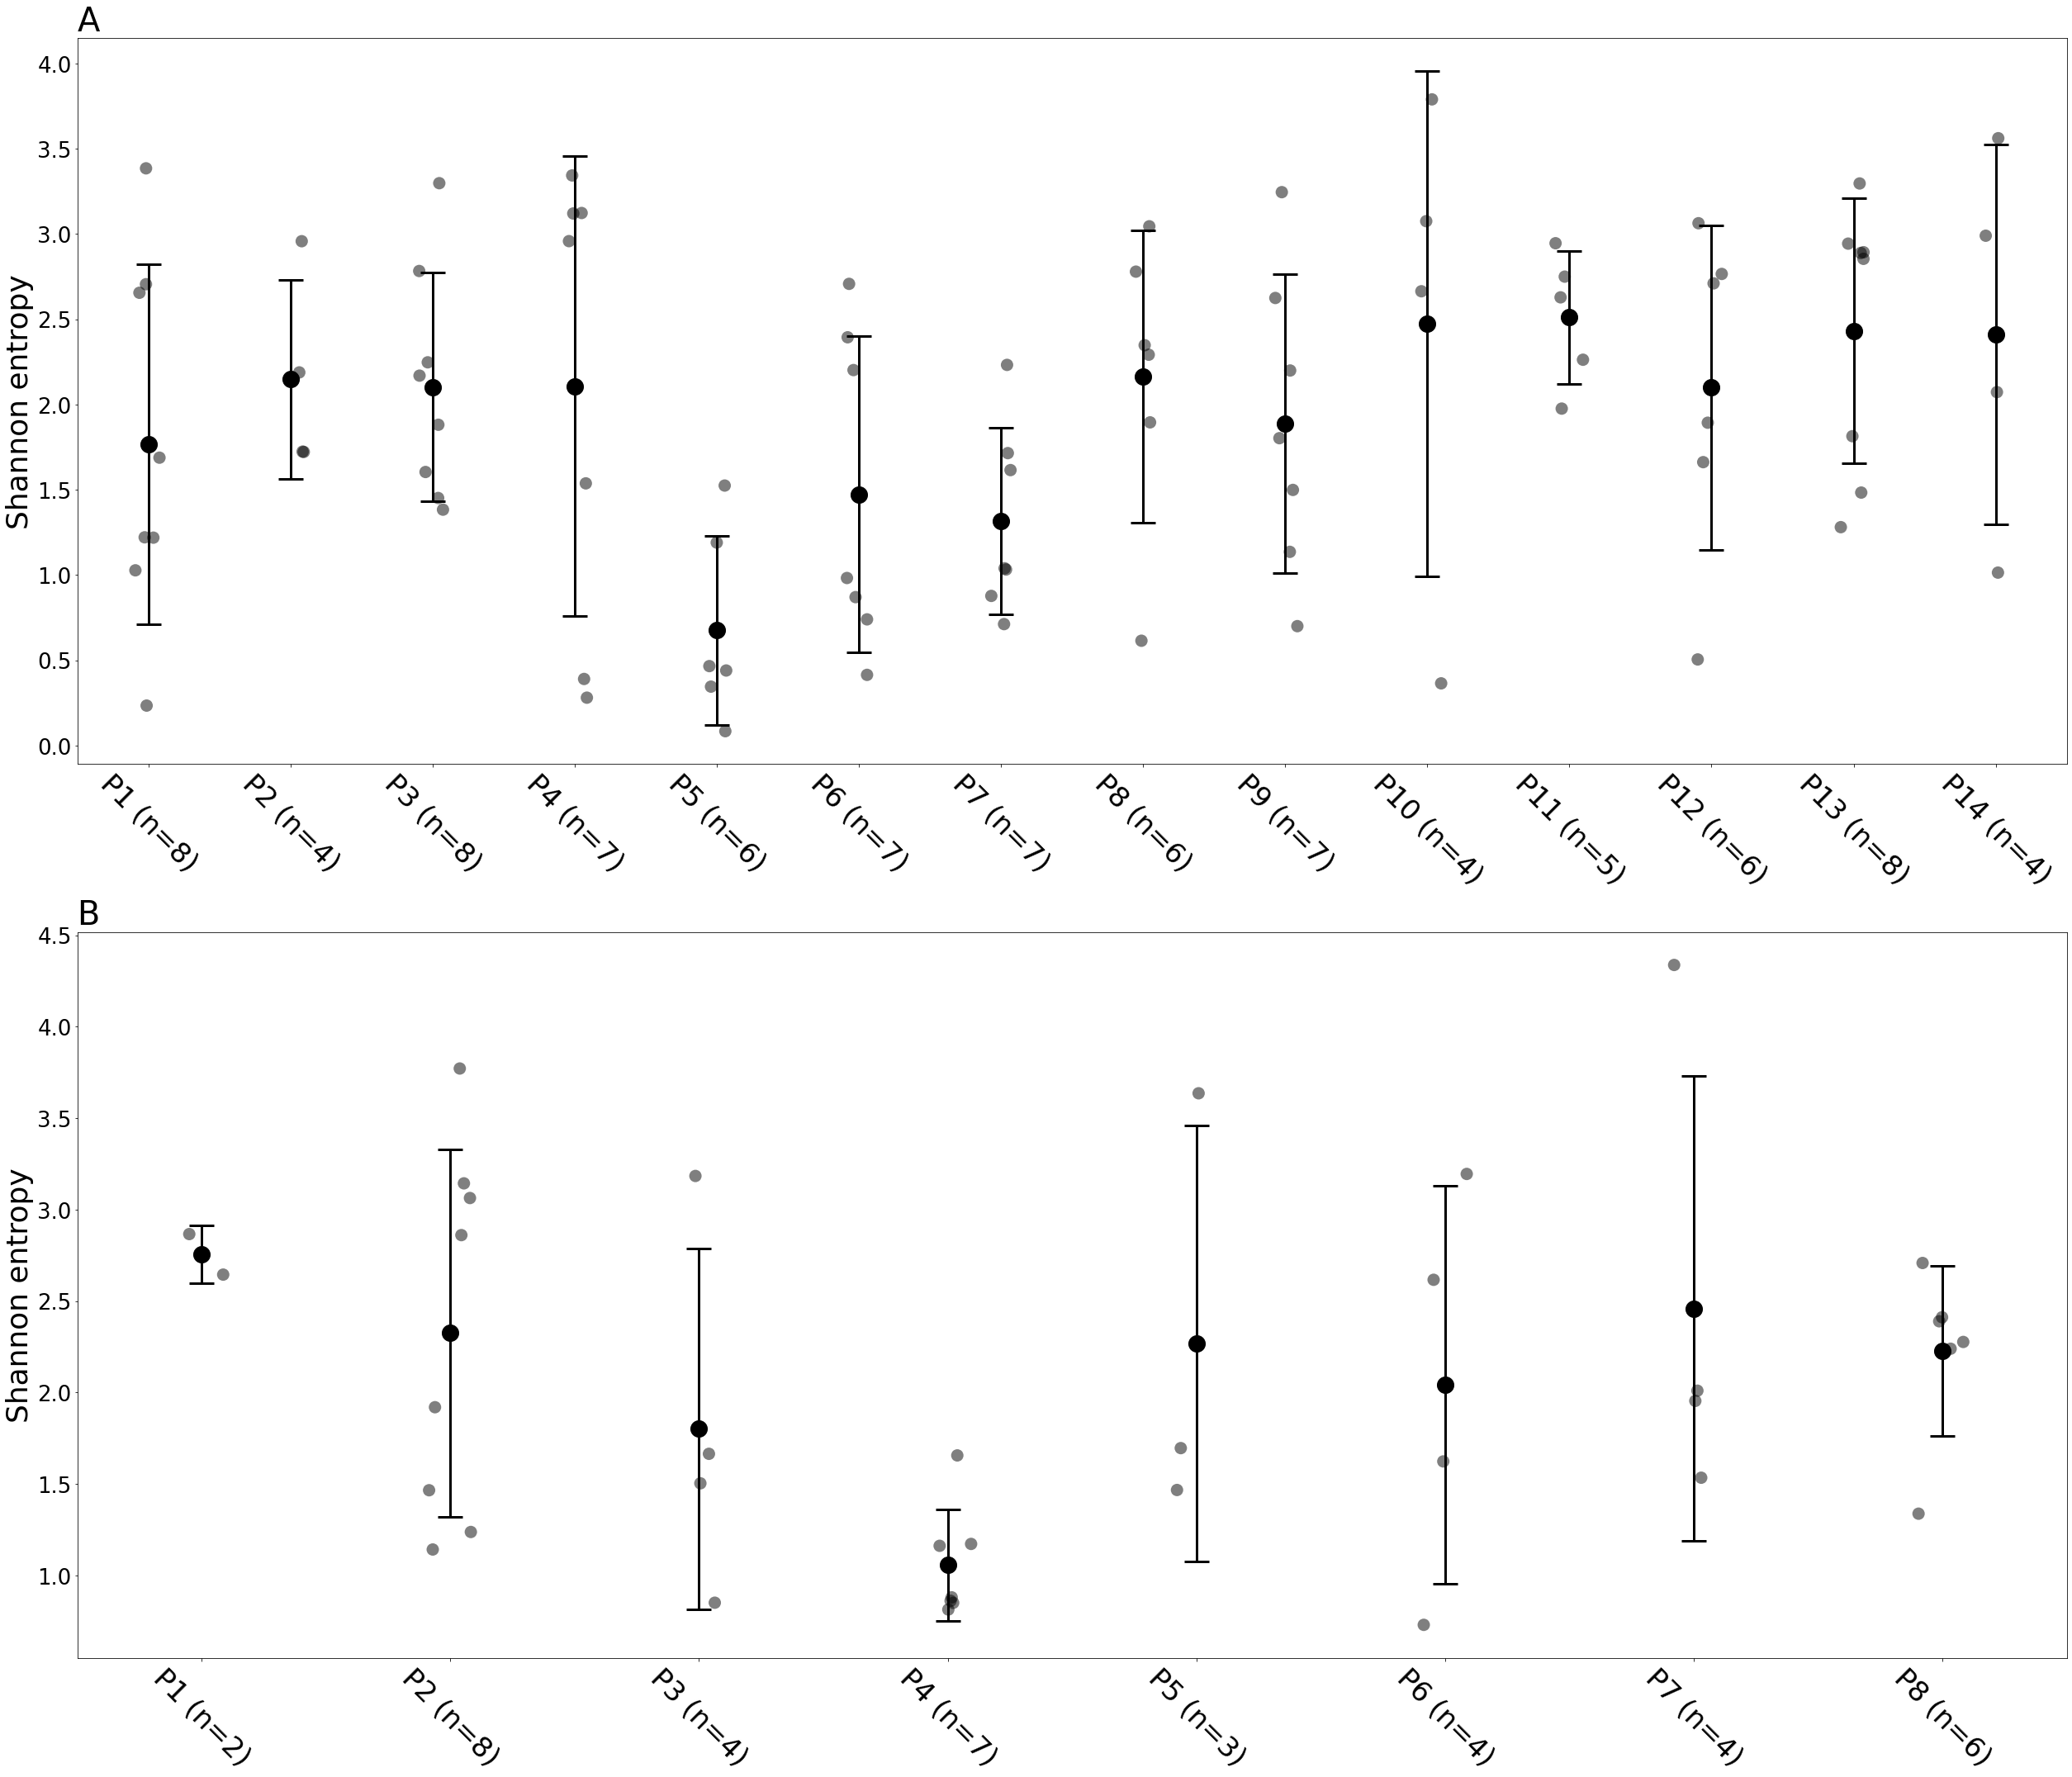

In [14]:
f4, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,30))
# CD
ax1.errorbar(x=cdf['Patient'].unique(), y=mean_cdf, yerr=std_cdf, color='black', linestyle='None', 
             marker='o', markersize=20, capsize=15, elinewidth=3, capthick=3)
sns.stripplot(ax=ax1, data=cdf, x="Patient", y="Shannon_entropy", size=15, alpha=.5, color='black')
ax1.set_title('A', fontsize=40, loc='left')
ax1.set_ylabel('Shannon entropy', fontsize=36)
ax1.set_xlabel('')
ax1.set_xticklabels(["P1 (n=8)","P2 (n=4)","P3 (n=8)","P4 (n=7)","P5 (n=6)","P6 (n=7)","P7 (n=7)","P8 (n=6)",
                     "P9 (n=7)","P10 (n=4)","P11 (n=5)","P12 (n=6)","P13 (n=8)","P14 (n=4)"])
ax1.tick_params(axis='both', labelsize=26)
ax1.tick_params(axis='x', labelrotation=-45, labelsize=34)

#UC
ax2.errorbar(x=ucf['Patient'].unique(), y=mean_ucf, yerr=std_ucf, color='black', linestyle='None', 
             marker='o', markersize=20, capsize=15, elinewidth=3, capthick=3)
sns.stripplot(ax=ax2, data=ucf, x="Patient", y="Shannon_entropy", size=15, alpha=.5, color='black')
ax2.set_title('B', fontsize=40, loc='left')
ax2.set_ylabel('Shannon entropy', fontsize=36)
ax2.set_xlabel('')
ax2.set_xticklabels(["P1 (n=2)","P2 (n=8)","P3 (n=4)","P4 (n=7)","P5 (n=3)","P6 (n=4)","P7 (n=4)","P8 (n=6)"])
ax2.tick_params(axis='both', labelsize=26)
ax2.tick_params(axis='x', labelrotation=-45, labelsize=34)

plt.tight_layout()


f4.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_H/diversity_Large_cohort/Patient_boxplots.png')
